
# Extending DNA Structures and Integration with Protein Data
This tutorial demonstrates how to extend DNA sequences from a loaded structure and integrate the extended DNA with protein components. This process is useful for creating complex models for simulations or visualization, aiding in the study of DNA-protein interactions.

## Steps Covered:
- Load and visualize the initial PDB structure.
- Isolate and extend the DNA component.
- Combine the extended DNA with the protein structure.
- Save the modified structure for further analysis.


## Loading and Visualizing Initial Structures
Start by loading a PDB file and visualize it to confirm the structure's integrity.

In [1]:
import mdtraj as md
import nglview as nv
import mdna as mdna 
%load_ext autoreload
%autoreload 2


# Load PDB file
pdb = md.load('./pdbs/1kx5.pdb')
view = nv.show_mdtraj(pdb)
view

/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


NGLWidget()

## Extending the DNA Structure
Isolate the DNA part, describe its current state, and then extend it at both ends.

DNA structure with 147 base pairs
Sequence: ATCAATATCCACCTGCAGATACTACCAAAAGTGTATTTGGAAACTGCTCCATCAAAAGGCATGTTCAGCTGGAATCCAGCTGAACATGCCTTTTGATGGAGCAGTTTCCAAATACACTTTTGGTAGTATCTGCAGGTGGATATTGAT
Trajectory: <mdtraj.Trajectory with 1 frames, 16755 atoms, 4416 residues, and unitcells>
Frames:  (147, 1, 4, 3)
Random sequence: CAAAATTAGAGTGAAGACGGTAGGTCTTCAGTTACA 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0 
temperature = 300
Circular: False
Random sequence: TTACACCCTCGCTTCGTAACCCGTAATAGGACGCTT 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0 
temperature = 300
Circular: False


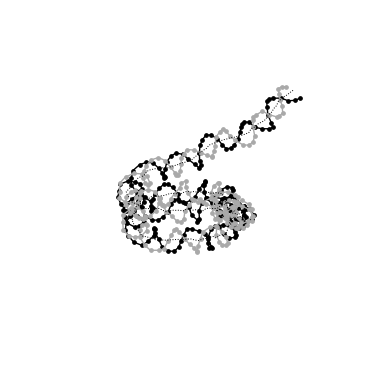

In [2]:
# Load DNA part from traj object
dna = mdna.load(pdb)
dna.describe()

# Add random linker DNA in forward and reverse direction. Note the exvol_rad parameter set to zero, because due to the wrapping of around the core protein, the exvol beads overlap. This is not allowed in the current implementation of the MC algorithm.
dna.extend(n_bp=36, exvol_rad=0)
dna.extend(n_bp=36, exvol_rad=0, forward=False)

# Visualize the extended DNA
dna.draw()

## Integration with Protein Structure
Isolate the protein part of the structure, combine it with the extended DNA, and save the new structure.

In [3]:
# Stack extended DNA and protein back together
protein = pdb.atom_slice(pdb.top.select('not chainid 0 1'))
dna_traj = dna.get_traj()
extended_traj = dna_traj.stack(protein)

view = nv.show_mdtraj(extended_traj)
view

NGLWidget()

In [4]:
# Save extended traj
extended_traj.save_pdb('./pdbs/1kx5_extended.pdb')